In [2]:
import pandas as pd

data = pd.read_csv("../data/US-pumpkins.csv")

# returns boolean array to filter pumpkins that has units of measurements in bushels
pumpkins_in_bushels = data["Package"].str.contains("bushel", case=True, regex=False)

# pick only rows with bushel UoM
pumpkins = data[pumpkins_in_bushels]

# print head
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
# how many empty cells we have in the data
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [4]:
# keep columns that we only interested in
columns = ["Package", "Low Price", "High Price", "Date"]

pumpkins2 = pumpkins.drop([c for c in pumpkins.columns if c not in columns], axis=1)
pumpkins2.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [5]:
price = (pumpkins2["High Price"] + pumpkins2["Low Price"]) / 2
print(price)

months = pd.DatetimeIndex(pumpkins2["Date"]).month
print(months)

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64
Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [6]:
pumpkins3 = pd.DataFrame({ "Month": months, "Package": pumpkins2["Package"], "Price": price })
pumpkins3.head()

,Month,Package,Price
70,9,1 1/9 bushel cartons,15.0
71,9,1 1/9 bushel cartons,18.0
72,10,1 1/9 bushel cartons,18.0
73,10,1 1/9 bushel cartons,17.0
74,10,1 1/9 bushel cartons,15.0


In [7]:
# recalculate price based on package size
ratio = 1 + 1/9
pumpkins3.loc[pumpkins3["Package"].str.contains("1 1/9"), "Price"] = price / ratio

# we assign one pd.Series to another. pd stores index and can get required values by row key (or index in this case)
# pd.Series([float(c) for c in range(0, 72)]) will also work
pumpkins3.loc[pumpkins3["Package"].str.contains("1/2"), "Price"] = price / 0.5
pumpkins3.head()

,Month,Package,Price
70,9,1 1/9 bushel cartons,13.5
71,9,1 1/9 bushel cartons,16.2
72,10,1 1/9 bushel cartons,16.2
73,10,1 1/9 bushel cartons,15.3
74,10,1 1/9 bushel cartons,13.5


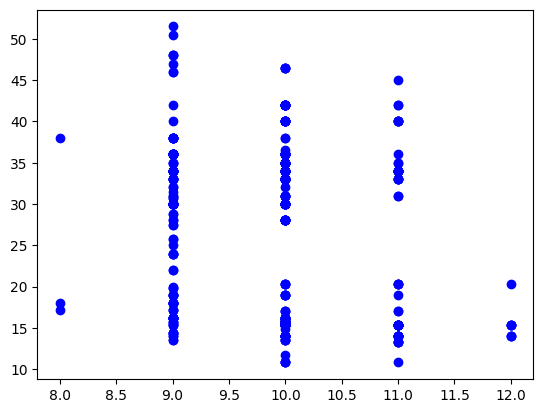

In [8]:
import matplotlib.pyplot as plt

plt.scatter(pumpkins3["Month"], pumpkins3["Price"], color="blue")
plt.show()

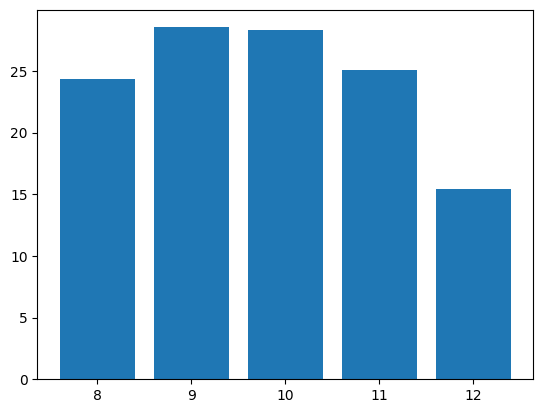

In [9]:
# group by month and get prices
price_per_month = pumpkins3.Price.groupby(pumpkins3.Month).mean()

plt.bar(price_per_month.index, price_per_month.values)
plt.show()

Text(0, 0.5, 'Pumpkins Price')

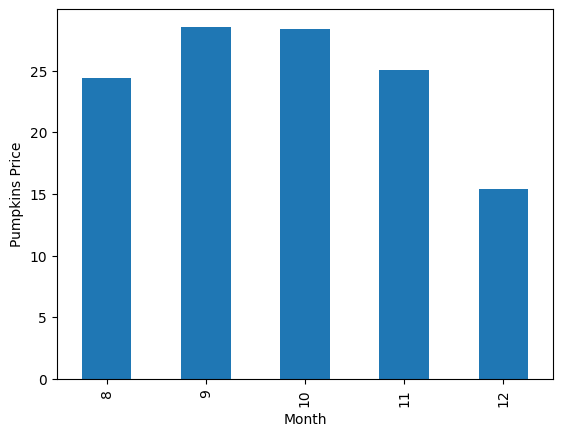

In [10]:
# the same but with pandas plot
# you don't need to list x label becuase it's index of the pd.Series
pumpkins3.groupby(["Month"]).Price.mean().plot(kind="bar")

# pd inside it uses matplotlib.pyplot, it means we can set it's labels directly to imported plt package
plt.ylabel("Pumpkins Price")